# Exracting Data

In [1]:
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np

# Extraction Stage
all_time_stocks = pd.read_csv("./stocks-data.csv")

all_time_stocks

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10438,2022-05-06,156.009995,159.440002,154.179993,157.279999,157.279999,116055700
10439,2022-05-09,154.929993,155.830002,151.490005,152.059998,152.059998,131577900
10440,2022-05-10,155.520004,156.740005,152.929993,154.509995,154.509995,115366700
10441,2022-05-11,153.500000,155.449997,145.809998,146.500000,146.500000,142689800


# Cleaning and Filtering Stage

Now we need to fliter the data set so that we only use the data we need which is in this case, the Dates and the Low pices

In [2]:
# filtering the all time stocks to only show the date and low
all_time_stocks = all_time_stocks.filter(["Date", "Low"])
all_time_stocks

,Date,Low
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10438,2022-05-06,154.179993
10439,2022-05-09,151.490005
10440,2022-05-10,152.929993
10441,2022-05-11,145.809998


Dates and Stock Value Format

In [3]:
all_time_stocks.values[0][0] # Date Value
date_format = "%Y-%m-%d"

In [4]:
all_time_stocks.values[1][1] # Stock Price Value

0.121652

#### Getting Stock Prices for only one given year

In [5]:
def getYearStocks(year:int):
    dates = []
    prices = []

    # Validate year value  
    if year > 9999 or year < 1:
        raise Exception(
            "Invalid year value: Year value must be between 1 and 9999 inclusive"
        )
    

    for count in range(all_time_stocks["Date"].size):

        # converting string date vale in date object
        date = datetime.strptime(all_time_stocks.values[count][0], date_format).date()
        
        if date.year == year:
            dates.append(all_time_stocks["Date"][count])
            prices.append(all_time_stocks["Low"][count])
    
    return pd.DataFrame({
        'Date': dates,
        'Low':prices
    })

# Data Wrangling

There are 365 days in a normal year and 366 in a leap year. Inorder to make it easier to analyze our data we need to average our stock prices for each month to make it more readable

So the next step is averaging the stock prices for each month

In [6]:
#Algorythm to find average for a month
def getAverage(months_prices:list[float]) -> float:
    count = len(months_prices)
    average = 0
    total = 0

    if len(months_prices) == 0:
        raise Exception("Months Price list cannot be empty")

    for item in months_prices:
        total += item
    
    average = total / count
    return average

Now the next step is actually generating a years average monthy stock prices and ploting them on a graph

In [7]:
def getAverageYearlyStock(year:int):

    yearly_stocks = getYearStocks(year)

    average_prices = []
    months = [ "Jan", "Feb", "Mar" , "Apr", "May", "Jun",
        "Jly", "Aug","Sept", "Oct", "Nov", "Dec"
    ]

    days = []
    actualMonths = []

    for day in yearly_stocks["Date"]:
        days.append(day)

    # get number of months in year
    num_months = datetime.strptime(days[-1], date_format).date().month

    for i in range(num_months):
        actualMonths.append(months[i])

    for m in range(1, num_months + 1):
        prices_in_month = []
        for day in days:
            if datetime.strptime(day, date_format).date().month == m:
                id = days.index(day)
                prices_in_month.append(yearly_stocks["Low"][id])
        
        average_prices.append(getAverage(prices_in_month))

    plt.plot(
        actualMonths,
        average_prices,
        linestyle='--',
        label=str(year),
        marker='o'
    )

    plt.title(f"Average Apple Stock for {year}")


# Visualization 
Finnally the data can be viewed and analyzed

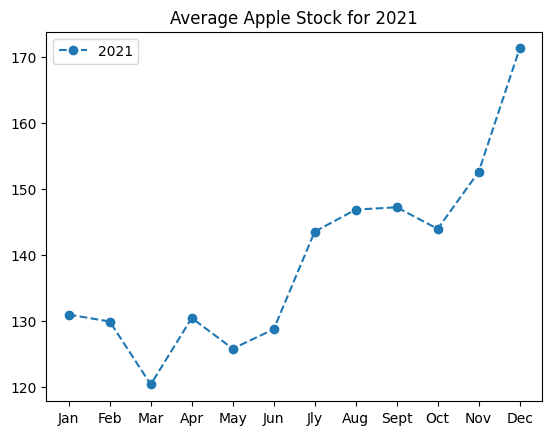

In [8]:


getAverageYearlyStock(2021)
plt.legend(loc='best')